In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sales_data = [
    ("Laptop", 5, 60000),
    ("Laptop", 3, 60000),
    ("Phone", 10, 20000),
    ("Phone", 5, 20000),
    ("Headphones", 15, 1500),
    ("Headphones", 10, 1500)
]

cursor.executemany(
    "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)",
    sales_data
)

conn.commit()


In [3]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
df


,product,total_qty,revenue
0,Headphones,25,37500.0
1,Laptop,8,480000.0
2,Phone,15,300000.0


In [4]:
print("📊 SALES SUMMARY")
print(df)


📊 SALES SUMMARY
      product  total_qty   revenue
0  Headphones         25   37500.0
1      Laptop          8  480000.0
2       Phone         15  300000.0


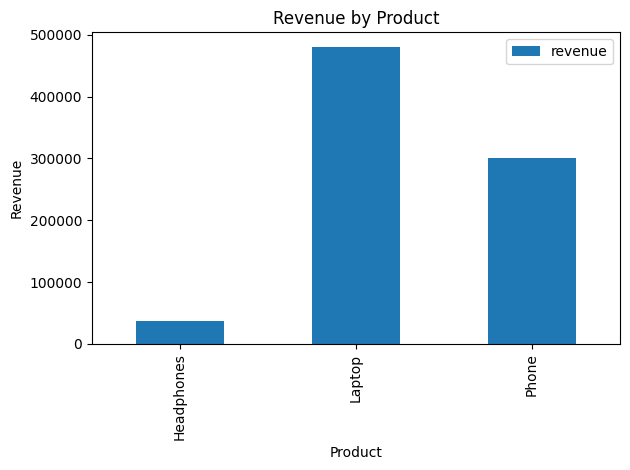

In [5]:
df.plot(kind='bar', x='product', y='revenue')

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

plt.savefig("sales_chart.png")
plt.show()


In [6]:
conn.close()
